In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import math

In [15]:
df1 = pd.read_csv('DF1', sep=',', index_col= 0)
df1.head()

,0,1,2,3
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079


## 1. Correlations

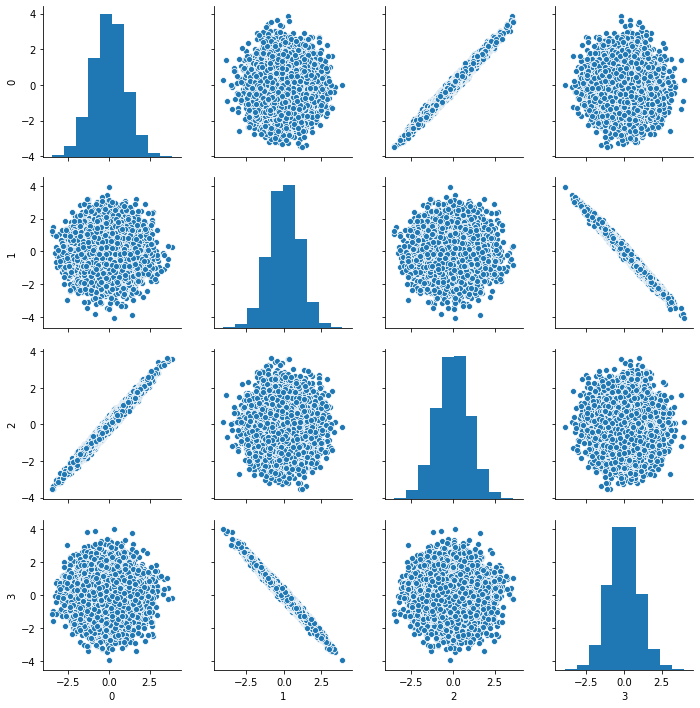

In [4]:
#use seaborn
sns.pairplot(df1)
sns.despine()

In [5]:
#use pandas
df1.corr()

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


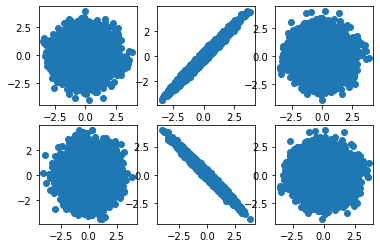

In [6]:
plt.subplot(231)
plt.scatter(df1['0'],df1['1'])
plt.subplot(232)
plt.scatter(df1['0'],df1['2'])
plt.subplot(233)
plt.scatter(df1['0'],df1['3'])
plt.subplot(234)
plt.scatter(df1['1'],df1['2'])
plt.subplot(235)
plt.scatter(df1['1'],df1['3'])
plt.subplot(236)
plt.scatter(df1['2'],df1['3'])

## Explicit expression for covariance matrix:

$$COV(X,Y)=  \frac{\sum_{i=1}^n (x_{i}-\bar{x})(y_{i}-\bar{y})} {n-1}$$

In [7]:
df1.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


C:\Users\Green\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Green\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Green\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Degrees of freedom <= 0 for slice
  import sys
C:\Users\Green\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Green\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


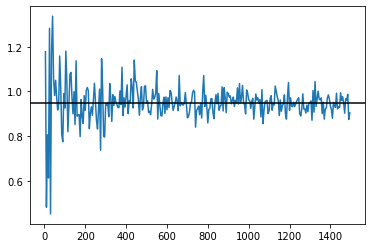

In [8]:
cov = [[1,0,0],[0,1,0.95],[0,0.95,1]]
mean = [0,0,0]
xlist = range(0,1500,5)
ylist = []
for x in xlist:
    gaussian = np.random.multivariate_normal(mean, cov, x)
    ylist.append(np.cov(gaussian,rowvar=False)[2][1])
    
plt.plot(xlist, ylist)
plt.axhline(0.95,0,5000,color='k')
plt.show()

## 3. Even More Standard Error 

In [16]:
import scipy.stats as st

#generate sample of size n
def getdata(n):
    data = []
    for i in range(n):
        x = np.random.normal(0,1)
        y = -3 + np.random.normal(0,1)
        data.append([x,y])
    return data

#calculate std of beta hat
def geterror(n):
    beta = []
    for x in range(100):
        data = getdata(n)
        data = pd.DataFrame(data, columns = ['x', 'y']) 
        x = data.as_matrix(['x'])
        y = data.as_matrix(['y'])
        X = np.column_stack((x,np.ones(y.shape[0])))
        linear = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),y)
        beta.append(linear[0][0])
#     standard = np.std(beta)/np.sqrt(n)
#     print(np.std(beta))
    return beta

beta = geterror(150)
sd = np.std(beta)
mn = np.mean(beta)
z = (-0.15-mn)/sd # get the z score to see the significance level
p = st.norm.cdf(z) # get the p value and compare to 0.01/0.05/0.1 
print("Mean of error is "+ str(mn)+" and standard deviation is "+ str(sd)+" .\n")
if p < 0.05:
    print("The value -0.15 is significant at the 0.01 level.")
elif p < 0.1:
    print("The value -0.15 is significant at the 0.05 level.")
else:
    print("The value -0.15 is significant at the 0.1 level.")

C:\Users\Green\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\Green\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Mean of error is 0.003961511380416008 and standard deviation is 0.08340688460010334 .

The value -0.15 is significant at the 0.01 level.


In [5]:
#generate two lists
sdlist = []
rootn = []
for x in range(50,2000,25):
    beta = np.std(geterror(x))
    sdlist.append(beta)
    rootn.append(1/math.sqrt(x))

C:\Users\Green\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\Green\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


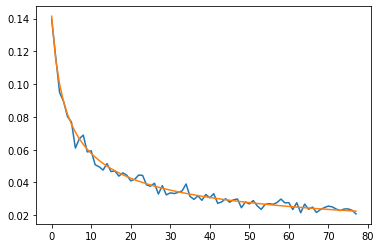

In [6]:
plt.plot(sdlist)
plt.plot(rootn)

## As we can see from the plot, two lines fit really well. It validates the thought that error of the size σ/sqrt(n) is roughly the standard deviation of the beta hat. 

## 4. Names and Frequencies

In [16]:
#first program
def topofyear(k, year):
    data = pd.read_csv('Names/Names/yob'+str(year)+'.txt',header=None)
    data = data.sort_values(by=[2],ascending=False)
    print(data.head(k))
    
topofyear(3,1998)

             0  1      2
16596  Michael  M  36615
16597    Jacob  M  36007
16598  Matthew  M  31138


In [19]:
#second program
def getfreq(year,name):
    data = pd.read_csv('Names/Names/yob'+str(year)+'.txt',header=None)
    men = data.loc[(data[0] == name)&(data[1] == 'M'),2].sum()
    women = data.loc[(data[0] == name)&(data[1] == 'F'),2].sum()
    print('The frequency of this name for man is '+str(men)+' and for women is '+str(women)+".")
    
getfreq(1998,'Mary')

The frequency of this name for man is 14 and for women is 6434.


In [22]:
# question 3
# We think the relative frequency is number of people in one name/number of people in total
def getrelfreq(year,name):
    data = pd.read_csv('Names/Names/yob'+str(year)+'.txt',header=None)
    numbernameman = data.loc[(data[0] == name)&(data[1] == 'M'),2].sum() #name of name in a specific name for man
    numberofman = data.loc[(data[1] == 'M'),2].sum() #total number of man
    numberofwoman = data.loc[(data[1] == 'F'),2].sum() #total number of woman
    numbernamewoman= data.loc[(data[0] == name)&(data[1] == 'F'),2].sum() #name of name in a specific name for woman
    print('The relative frequency of this name for man is '+str(numbernameman/numberofman)+' and for women is '+str(numbernamewoman/numberofwoman)+".")

getrelfreq(1998,'Mary')

The relative frequency of this name for man is 7.3282161446882995e-06 and for women is 0.0036431068895715073.


In [25]:
#get unique list of name
namecount = []
yearlist = np.arange(1881,2016)
data = pd.read_csv('Names/yob1880.txt',header=None)
for x in yearlist:
    wholedata1 = pd.read_csv('Names/yob'+str(x)+'.txt',header=None)
    wholedata = pd.concat([data, wholedata1], axis=0)
        
names = wholedata[0].unique()

FileNotFoundError: [Errno 2] File b'Names/yob1880.txt' does not exist: b'Names/yob1880.txt'

In [24]:
def getrelfreq(data,name):
    numbernameman = data.loc[(data[0] == name)&(data[1] == 'M'),2].sum()
    numberofman = data.loc[(data[1] == 'M'),2].sum()
    numberofwoman = data.loc[(data[1] == 'F'),2].sum()
    numbernamewoman= data.loc[(data[0] == name)&(data[1] == 'F'),2].sum()
    return numbernameman/numberofman,numbernamewoman/numberofwoman


def sumyeardata(yr1,yr2):
    yearlist = np.arange(yr1,yr2)
    for x in yearlist:
        wholedata1 = pd.read_csv('Names/Names/yob'+str(x)+'.txt',header=None)
        wholedata = pd.concat([data, wholedata1], axis=0)
    return wholedata

def getnamedict(data):
    namedict = {}
    for index, row in data.iterrows():
        if row[0] not in namedict.keys():
            namedict[row[0]] = []
    for key in namedict.keys():
        popularity_score = getrelfreq(data,key)
        namedict[key]=popularity_score[0]-popularity_score[1]
    return namedict

#set time interval
testx = sumyeardata(1881,1885)
x = getnamedict(testx)
testy = sumyeardata(1885,1887)
y = getnamedict(testy)

name_intersection = set( x.keys() ) & set( y.keys() )
for name in name_intersection:
    first = x[name]/abs(x[name])
    second = y[name]/abs(y[name])
    if ((first == -1) and (second == 1)):
        print(name)
    if ((first == 1) and (second == -1)):
        print(name)

Bee
Nova
Bird
Vollie
Jodie
Arley
Dennie
Shirley


## 5. Regression and Interaction Terms (Check the BDS lecture 5 file)

### After adding the interaction terms, we can see the slopes of two lines are not the same anymore, which means for those children whose mom have a high school degree and those whose mom don't, each unit increase in Mom IQ is correlated with different change in children's IQ. In other words, Mom's IQ has a larger impact on child's IQ for those mom who didn't graduate from high school than those who did. Compared to previous graph I obtain which indictates mom's IQ influnce child's IQ equally no matter they have a high school degree or not, adding interaction term would make more sense since if one mom doesn't receive high education, the support she could give to her child is so limited. We think there are two main factoring deciding kid score which are Kid's IQ and parent's education background and Mom's IQ has a causal effect on Kid's IQ. Therefore, if one mom didn't have a high school degree, her IQ is going to influnce her child's score more than those mon who had a high school degree. This is why I think keeping interaction term would be better. (For mom who has a high school degree, the correlation is 0.485 and 0.969 for who didn't.)